In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install pyyaml==5.1
# !pip uninstall torch
# !pip uninstall detectron2
!pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html
# !pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html # cuda 11.1
# exit()  # restart runtim
# !pip install geopandas rtree fiftyone

     |████████████████████████████████| 274 kB 7.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=c12eeb9642be086b6326849d9a1546c22e7026acbbcc452aa04d0e60f0a4ac9f
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 831.4 MB 3.0 kB/s 
     |████████████████████████████████| 22.1 MB 1.1 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.11.1+cu111
    Uninstalling torchvision-0.11.1+cu111:
      Succ

In [ ]:
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.modeling import build_model
from detectron2.checkpoint import DetectionCheckpointer
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances

In [ ]:
ds_path = f'/content/drive/My Drive/PyPSA_Africa_images/datasets/duke_train/data/' 
json_path = f'/content/drive/My Drive/PyPSA_Africa_images/datasets/duke_train/labels.json'
ds_name = 'duke'

if ds_name in DatasetCatalog.list():
    DatasetCatalog.remove(ds_name)
    MetadataCatalog.remove(ds_name)

register_coco_instances(ds_name, {}, json_path, ds_path)

In [ ]:
retina_net = 'retinanet_R_101_FPN_3x.yaml'
# frcnn= 'faster_rcnn_R_101_FPN_3x.yaml'

current = retina_net

cfg = get_cfg() # Model Config
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/"+current))
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2   # for R-CNN Models
cfg.MODEL.RETINANET.NUM_CLASSES = 2   # for RetinaNet  
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # for R-CNN Models
cfg.MODEL.RETINANET.SCORE_THRESH_TEST = 0.1  # for Retinanet

model_name = '2021-10-18_retina101_100000_dukeset/model_final.pth'
model_path = '/content/drive/MyDrive/PyPSA_Africa_images/models/'+model_name

cfg.MODEL.WEIGHTS = model_path

Loading config /usr/local/lib/python3.7/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


In [ ]:
predictor = DefaultPredictor(cfg)

In [ ]:
# IMPORTANT: DECIDES IF IMAGES ANALYSED ARE FROM THE DUKE OR MAXAR DATASET 
# ALSO: the cfg.MODEL.RETINANET.SCORE_THRESH_TEST has to be much lower for maxar (recommend 0.1)
# for duke images, I recommend 0.5

# (results are better for duke, but we get some really cool detections for maxar) 
IMG_SOURCE = 'duke'

data_dir = '/content/drive/My Drive/PyPSA_Africa_images/datasets/'+IMG_SOURCE+'_train/'
images = os.listdir(data_dir+'data/')
images = [data_dir+'data/'+img for img in images if img.endswith('.png')]

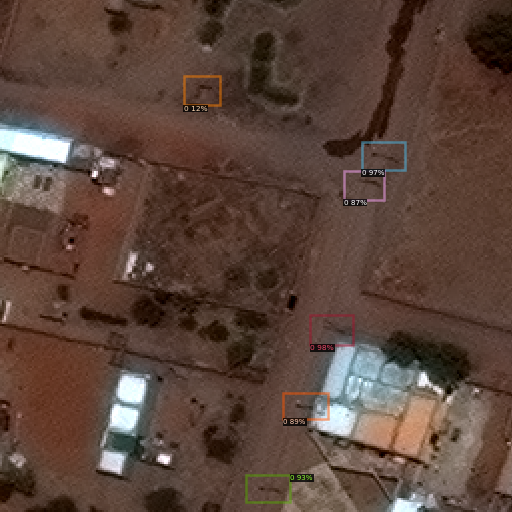

In [ ]:
img = cv2.imread(images[np.random.randint(0, len(images)-1)])
out = predictor(img)
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get('duke'), scale=2)
out = v.draw_instance_predictions(out["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
import os
import torch

data_dir = '/content/drive/My Drive/PyPSA_Africa_images/datasets/duke_train/'
dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)


'''
images, labels = next(iter(dataloader))
_, ax = plt.subplots(1, 1, figsize=(7,7))
ax.imshow(images[2].permute(1, 2, 0))
plt.show()
'''   


NameError: ignored

In [ ]:
def get_images(loader):
    """
    returns batch size images in dict; takes torch.utils.data.DataLoader class 
    """
    images, labels = next(iter(loader))

    # imgs_dict = {'img for img in images}
    imgs_dict = {'image': images, 'heigth': 256, 'width': 256}
    return imgs_dict

x = get_images(dataloader)

In [ ]:
from detectron2.data import DatasetMapper
from detectron2.data.datasets import load_coco_json
import json

data_dir = '/content/drive/My Drive/PyPSA_Africa_images/datasets/duke_train/'

mapper = DatasetMapper(is_train=False, augmentations=[], image_format='BGR')
mapper = mapper.from_config(cfg, is_train=False)
# images = mapper(data_dir+'labels.json')

# images = mapper(load_coco_json(data_dir+"labels.json", data_dir+'data/')[0])
#images = json.load(ope)

